#### TEAM PROJECT SUBMISSION- FINAL
1. AMRITA SHARMA
2. PREETHI RANGANATHAN
3. NIVEDITA VARADHARAJAN
4. YUNJIA XU

### Data Product Video link: https://www.useloom.com/share/3743659ff3ce441db2ebf961893a4e34


# Data Product: Income inequality in the United States

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
%matplotlib inline
import sklearn as sk
from pandas import ExcelWriter
from pandas import ExcelFile
import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


## CLAIM :  Income inequality in the United States has increased significantly over the years.

### Gini Index

Gini Index is one of the most popular measures of Income Inequality. 

The Gini coefficient incorporates the detailed shares data into a single statistic, which summarizes the dispersion of income across the entire income distribution. The Gini coefficient ranges from 0, indicating perfect equality (where everyone receives an equal share), to 1, perfect inequality (where only one recipient or group of recipients receives all the income). The Gini is based on the difference between the Lorenz curve (the observed cumulative income distribution) and the notion of a perfectly equal income distribution.


The dataset is from 
https://www.statista.com/statistics/219643/gini-coefficient-for-us-individuals-families-and-households/   
1. It has Gini computed for U.S. households from 1990 to 2016. Information is contained in two columns Unnamed:1, Unnamed: 2, but it has it in different data formats and there are columns and rows with redundant information. So we cleaned the data, before plotting it further.

In [2]:
Gini=pd.ExcelFile('Gini.xlsx')
Gini=pd.read_excel(Gini,'Data')

#The header is the third row and data starts from fourth row. The unnmaed column:0 is just NANs. Hence, removing it.
Gini=Gini.iloc[3:]
Gini.drop('Unnamed: 0',axis=1,inplace=True)
Gini.rename(columns={'Unnamed: 1':'Year','Unnamed: 2':'Gini_Index'}, inplace=True)
Gini.dtypes # character strings appear as object data types

# Converting Gini column to numeric 
Gini['Gini_Index']=pd.to_numeric(Gini['Gini_Index'])

#Stripping unwanted punctuations from date values and making it as proper values.
Gini['Year']=Gini['Year'].apply(lambda x : x.strip("'`"))

#Converting year into date time objects
Gini['Year']=Gini['Year'].apply(lambda x : int(x))
Gini['Year']=Gini['Year'].apply(lambda x : (1900+x) if int(x/10) ==9 else (2000+x))

File on which plot will be made to show gini trend across years.

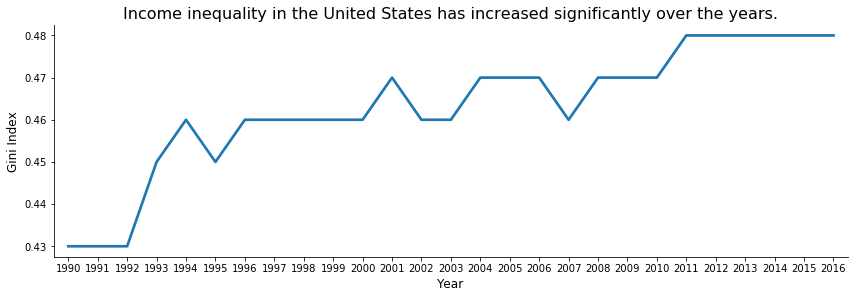

In [3]:
Gini.to_csv('Gini inequality.csv')
sns.factorplot(x='Year',y='Gini_Index',data=Gini,aspect=3,markers='None')
plt.ylabel("Gini Index", fontsize = 12)
plt.xlabel("Year", fontsize = 12)
plt.title("Income inequality in the United States has increased significantly over the years.", fontsize=16);

The Gini index of US is 0.346 in 1979. Now it is 0.48. It is 38.72% increase. The graph shows an increasing trend of Gini Index since 1990. It means that overall income disparity has increased in the united states over the years, though the increase is not too much in the last few years. For some specific drops, such as that in 2007 and 1995, they may be because of recession for that time. Yes, some degree of income inequality may be good for economy, but if it is keeping rising, we will have to face some problems.


**Long term impact of income inequality:**
1. Survey of research conducted between 1968 and 2000, https://sevenpillarsinstitute.org/consequences-economic-inequality/) concludes that economically unequal societies have higher crime rates and inequality is “the single factor most closely and consistently related to crime." 

2. [Research](https://qz.com/1057324/without-equality-of-income-there-can-be-no-equality-of-opportunity/) shows that income inequality hampers social mobility.“[The Price of Inequality]

3. (https://www.nytimes.com/2012/08/05/books/review/the-price-of-inequality-by-joseph-e-stiglitz.html?pagewanted=all),” the Nobel laureate Joseph E. Stiglitz argues that “we are paying a high price for the inequality that is increasingly scarring our economy.” He says that rising inequality is putting a brake on growth and promoting economic instability.

4. The result of a substantial poor population, a defining feature of economic inequality, is a less effective lower-income work force, higher disease and mortality rates, higher health care costs, and progressively deepening poverty for afflicted groups. https://sevenpillarsinstitute.org/consequences-economic-inequality/)

**Exploratory Analysis:**

“Income inequality in the United States has increased significantly since the 1970s after several decades of stability, meaning the share of the nation's income received by higher income households has increased” 
[Wikipedia- “Income inequality in the United States”](https://en.wikipedia.org/wiki/Income_inequality_in_the_United_States)


<img src="https://github.com/nivs2710/Nivi_Assignments_DataViz/raw/master/TeamProject_Final%20Version/Claim1.JPG" width="500" height="400" />

Joseph E. Stiglitz said:” The upper 1% of Americans are now taking in nearly a quarter of the nation’s income every year. 
The wealth rather than income, the top 1% control 40%. 25 years ago, the corresponding wealth figures were 12% and 33%.” in his book, “The Great Divide”. Since 1970s, the share of top 1percent increases while bottom 40 percent decreases. It means that the increasing income disparity may be caused by very few people taking much more shares of income.


Chart Assumption: The second graph refers to the metrics on the date "now" and since the year on which the article was written was in 2011, we are assuming that to be current period



**We analyzed this change in income shares for the top few and the bottom few to see how it correlates to the change in the gini index over the years. And our study led to claim 1**

**Pls Note: We also analyzed the tax impact on the gini index. Pls refer the making part for the same**


### CLAIM 1:

### The rising share in the income for the top 1% of population is contributing to the increasing Income Disparity

### The above factor can be substantiated by the fact that the Income shares for the top 1% of people is increasing, while that for the bottom 40% people has been decreasing over the years

In [4]:
comp = pd.read_excel('QuantileData.xlsx')
comp['Bottom 40 percent'] = comp['Lowest Quintile'] + comp['Second Quintile']
comp['year'] = comp['Year'].fillna(0.0).astype(int)
quantile = comp[['year','Top 1 Percent','Bottom 40 percent']]
newdf = quantile.melt('year',var_name='Population', value_name = 'vals')
newdf=newdf[newdf.year !=0]

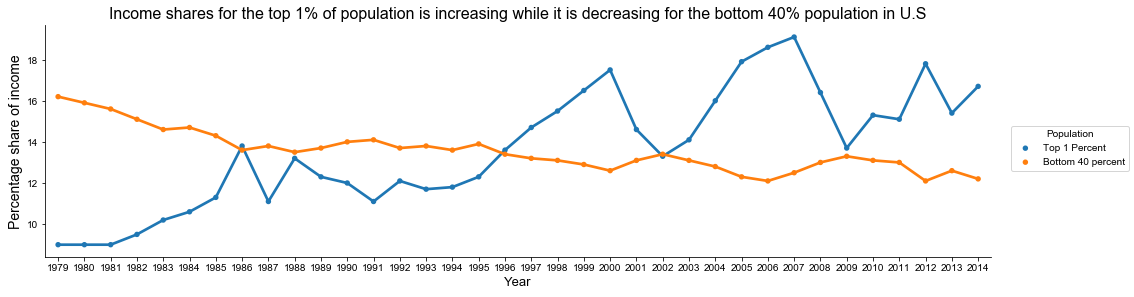

In [5]:
sns.factorplot(x = 'year', y='vals', hue = 'Population', data= newdf, aspect = 3.5, markers='.')
plt.ylabel('Percentage share of income', fontsize=14)
plt.xlabel('Year', fontsize=13)
sns.set(style="ticks")
#plt.xticks(np.arange(min(newdf.year),max(newdf.year)+1,5.0))
plt.title('Income shares for the top 1% of population is increasing while it is decreasing for the bottom 40% population in U.S',fontsize=16);

Dataset Source: Congressional Budget Office https://www.cbo.gov/publication/53597 Supplemental Data (single Excel file)

The dataset contains percentage of income contributed by lowest, second, middle, fourth, highest quintiles, 81 to 90 percentile, 91 to 95 percentile and top 1 percent of the population.

We just picked up the lowest and second quintile and top 1 percent beacuse we are concerned about the income contribution of how top 1 percent and bottom 40 percent people. 

### We further explored some other factors that contributed to gini index:

1. Gender disparity
2. Unemployment Rate
3. Racial disparity

### (I) Exploring Income gap between Men and Women

Validity: Gender wage gaps directly contribute to income inequality, and higher gaps in labor force participation rates between men and women result in inequality of earnings between sexes, thus creating and exacerbating income inequality.
https://www.weforum.org/agenda/2015/10/why-gender-and-income-inequality-are-linked/

The dataset is from https://www.bls.gov/news.release/wkyeng.t01.htm

The data given is Gender wise median weekly earnings for each quarter. We are choosing the following columns for the explanatory data analysis:
1. Year and Quarter - Data has been summarized for each quarter in the source itself
2. Median Weekly earnings In current dollars Men. 
3. Median Weekly earnings In current dollars Women.

In [6]:
gender=pd.ExcelFile('Gender_Pay_Quarterly.xlsx')
gender=pd.read_excel(gender)

#Dropping the NA's from the data frame.
gender = gender.dropna()

#Creating a new Year column to group men and women median weekly earnings in dollars
gender['Year']=gender['Year and quarter'].apply(lambda x: x[0:4])

#Grouped by year
groupedbyYear = gender.groupby('Year')[['Median weekly earnings In current dollars Men $',\
                                        'Median weekly earnings In current dollars Women $']].mean().reset_index()

#Creating a new dataframe for men earnings seperately
men=groupedbyYear.copy()
men['category'] = 'male'
men.rename(columns = {'Median weekly earnings In current dollars Men $':'Earnings_Per_thousand'}, inplace = True)
men.drop(['Median weekly earnings In current dollars Women $'],axis=1,inplace=True)
men.head()

#Creating a new dataframe for women earnings seperately
women=groupedbyYear.copy()
women['category'] = 'female'
women.rename(columns = {'Median weekly earnings In current dollars Women $':'Earnings_Per_thousand'}, inplace = True)
women.drop(['Median weekly earnings In current dollars Men $'],axis=1,inplace=True)
women.head()

#Appending male and female dataframes to plot
final1 = men.append(women)

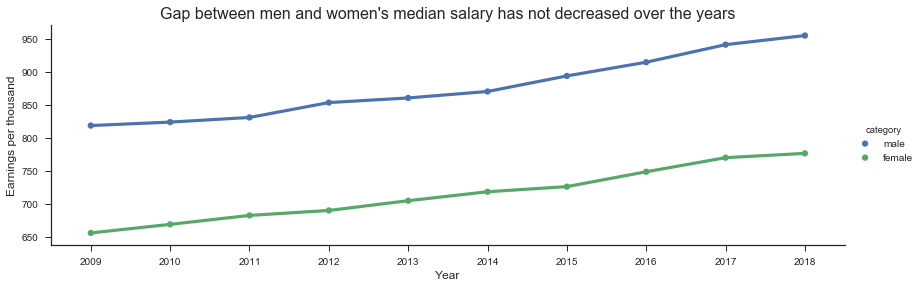

In [7]:
sns.factorplot(x = 'Year', y = 'Earnings_Per_thousand', data = final1, hue = 'category', aspect = 3, markers='.')
plt.ylabel("Earnings per thousand", fontsize = 12)
plt.xlabel("Year", fontsize = 12)
plt.title("Gap between men and women's median salary has not decreased over the years", fontsize=16);

The graph shows that the gap between men and women's median salary has not decreased over the years. Ideally, the gap has widened a bit. This is depicted in the next plot.

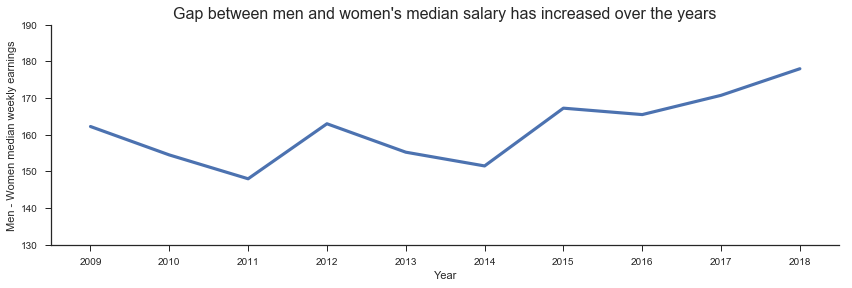

In [8]:
groupedbyYear['Men - Women median weekly earnings']=groupedbyYear['Median weekly earnings In current dollars Men $']-\
groupedbyYear['Median weekly earnings In current dollars Women $']
g=sns.factorplot(x='Year',y='Men - Women median weekly earnings',data=groupedbyYear,aspect=3,markers='None')
g.set(ylim=(130, 190))
plt.title("Gap between men and women's median salary has increased over the years", fontsize=16);

Even though the gap between men and women's median salary fluctuates from 2009 to 2018, we can see a trend that the highest point during a rising period is higher and higher, and the lowest point during a decreasing period is also higher and higher. It means that the gap between men and women's median salary is generally increasing. Now we will figure out that in the same position, do we still have a wage gap for gender.

In [9]:
df = pd.read_csv("Data USA - Bar Chart of Wage by Gender in Common Jobs in the United States.csv")

df = df[['year','soc_name','sex_name','avg_wage_ft']]
df = df[df.year == 2016]

dfnew = df.merge(df, left_on='soc_name', right_on='soc_name')
dfnew = dfnew[(dfnew.sex_name_x != dfnew.sex_name_y)].drop_duplicates('soc_name')
dfnew['male_female']=dfnew.avg_wage_ft_x - dfnew.avg_wage_ft_y

#proportion of female has higher wage than male in the same position
prob_1 = round(float(len(dfnew[dfnew.male_female< 0]))/len(dfnew),4)
#proportion of male has higher wage than female in the same position
prob_2 = round(float(len(dfnew[dfnew.male_female>0]))/len(dfnew),4)

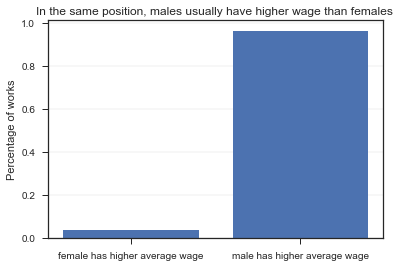

In [10]:
x=np.arange(2)
y=[prob_1,prob_2]
fig, ax = plt.subplots()
plt.bar(x, y)
plt.xticks(x, ('female has higher average wage', 'male has higher average wage'))
ax.set_title("In the same position, males usually have higher wage than females ")
ax.set_ylabel('Percentage of works')
ax.yaxis.grid(linestyle='-',linewidth=0.3)

plt.show()

Sourc: [Data USA](https://datausa.io/profile/geo/united-states/#category_wages)

Nearly in **96 percent of jobs**, male has higher average wage than woman in the same position. There is obviously  common income disparity between genders! This is a graph we may not use in the future but the numbers.

**Conclusion:  the income inequality really exists between male and female. This gap can be one of the important factors that contribute to the rising gini index.**

### (2) Exploring Correlation of Gini and Unemployment Rate within each Race

Unemployment and inequality are closely related to each other. When considered from a larger point of view, unemployment is the reason and inequality is the outcome. http://www.economywatch.com/unemployment/in-equality.html

The dataset for unemployment rate is https://www.bls.gov/charts/state-employment-and-unemployment/state-unemployment-rates-map.htm#

Here we are focussing on employment discrimination based on race in addition to total employment rate. Hence dropping men and women unemployment rate.

In [11]:
Unemp=pd.ExcelFile('Umemp.xlsx')
Unemp_race=pd.read_excel(Unemp,'Sheet3')
Unemp_race['Date']=pd.to_datetime(Unemp_race['Month'],errors='coerce')
df=Unemp_race.copy()

#Dropping the men and women unemployment rates because it is a known fact that rates will always be different.
df.drop(['Men, 20 years and over','Women, 20 years and over','16 to 19 years old','Month'],axis=1,inplace=True)
df.dropna(axis=0,inplace=True)

#To group by year, picking year from the date column
df['Year']=df['Date'].apply(lambda x:int(x.year))

#Making new dataframes for each racial category and binding it together.
dfW=df.copy()
dfW['Race']='White'
dfW.drop(['Black or African American','Hispanic or Latino','Asian'],axis=1,inplace=True)
dfW.rename(columns={'White':'UnemploymentRate'},inplace=True)
dfB=df.copy()
dfB['Race']='BlackorAfricanAmerican'
dfB.drop(['Hispanic or Latino','Asian','White'],axis=1,inplace=True)
dfB.rename(columns={'Black or African American':'UnemploymentRate'},inplace=True)
dfA=df.copy()
dfA['Race']='Asian'
dfA.drop(['Black or African American','Hispanic or Latino','White'],axis=1,inplace=True)
dfA.rename(columns={'Asian':'UnemploymentRate'},inplace=True)
dfH=df.copy()
dfH['Race']='Hispanic'
dfH.drop(['Black or African American','Asian','White'],axis=1,inplace=True)
dfH.rename(columns={'Hispanic or Latino':'UnemploymentRate'},inplace=True)
dftotal=dfW.append([dfH,dfA,dfB])
dftotal=dftotal[dftotal.Year<=2016]

In [12]:
dftotal=dftotal.groupby(['Year','Race'])[['UnemploymentRate']].mean()
dftotal.reset_index(inplace=True)

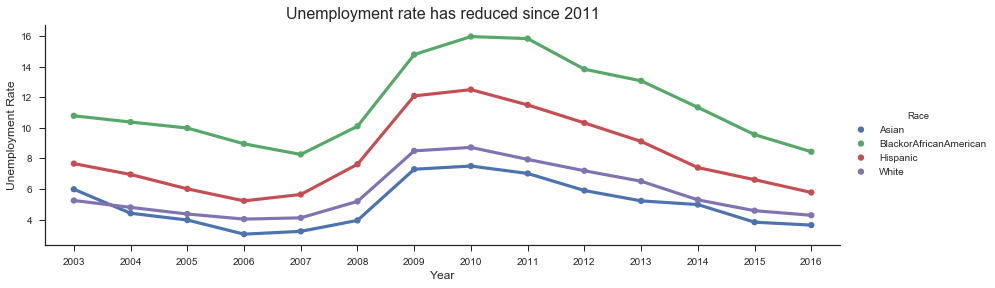

In [13]:
sns.factorplot(x='Year',y='UnemploymentRate',hue='Race',data=dftotal,aspect=3,markers='.')
plt.title("Unemployment rate has reduced since 2011", fontsize=16)
plt.ylabel("Unemployment Rate", fontsize = 12)
plt.xlabel("Year", fontsize = 12)
Gini_cut=Gini[Gini.Year>2002]

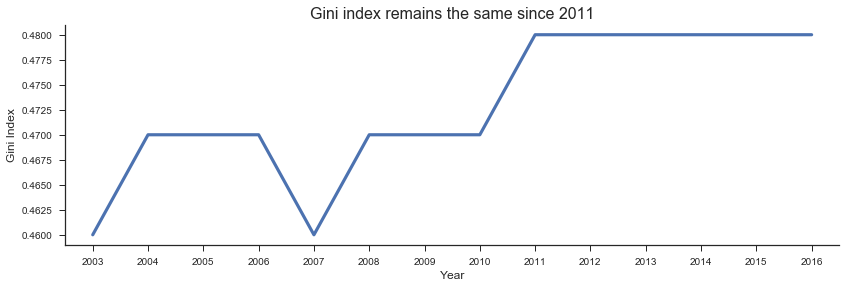

In [14]:
sns.factorplot(x='Year',y='Gini_Index',data=Gini_cut,aspect=3,markers='None')
plt.title("Gini index remains the same since 2011", fontsize=16);
plt.ylabel("Gini Index", fontsize = 12)
plt.xlabel("Year", fontsize = 12);

**Our original hypothesis was that higher unemployment rate contributes to the rise in the Gini Index. But comparing the two graphs, we can see that even if the overall unemployment rate has decreased over the years, the GINI index has not changed (ref: 2011 to 2016).**

**Second hypothesis: the decreasing gap in the unemployment rates between people belonging to different races  should have a decreasing effect on the overall gini values.
But, comparing the above two graphs, we can see that even when the differences in the unemployment rate reduced (trends seen from 2011 onwards), The gini index hasn't come down correspondingly.**

**So, we need to find out what others factor related to unemployment rate contribute to the variation in the income inequality**


### (3) Exploring GINI Indexes within each race

We tried to analyse the Gini Index changes within each race.

[Source: U.S. Census Bureau, Current Population Survey, Annual Social and Economic Supplements.](www2.census.gov/programs-surveys/cps/techdocs/cpsmar17.pdf)

The file contains Gini index for each race(Gini within each race) and overall gini index from 2002 to 2016.

Reading the file and converting year to numeric

In [15]:
G=pd.ExcelFile('Gini_By_Race.xls')
G1=pd.read_excel(G,'f04')
G2=G1.iloc[2:,]
G2.columns=G2.iloc[0]
GiniByRace=G2.iloc[1:72,]
GiniByRace['Year'].dtype # 
GiniByRace['Yr']=GiniByRace['Year'].apply(str)
GiniByRace['Yr2']=GiniByRace['Yr'].apply(lambda x: x[0:4])
GiniByRace['Yr2']=pd.to_numeric(GiniByRace['Yr2'])
GiniByRace.head()

#Picking only the required columns and selecting values greater than 2002.
GiniByRace=GiniByRace[['Yr2','Total','White\nAlone, Not\nHispanic','Black\nAlone','Asian\nAlone'\
                       ,'Hispanic\n(any\nrace)']]
GiniByRace.rename(columns={'White\nAlone, Not\nHispanic':'White','Black\nAlone':'Black'\
                           ,'Asian\nAlone':'Asian','Hispanic\n(any\nrace)':'Hispanic','Yr2':'Year'},inplace=True)
GiniByRace=GiniByRace[GiniByRace.Year>=2002]
GiniByRace=GiniByRace.apply(pd.to_numeric)
GiniByRace.dtypes
GiniByRace=GiniByRace.groupby('Year')['Total','White','Black','Asian','Hispanic'].mean()
GiniByRace=GiniByRace.reset_index()
GiniByRace=GiniByRace.rename(columns={'Total':'All_Races'})

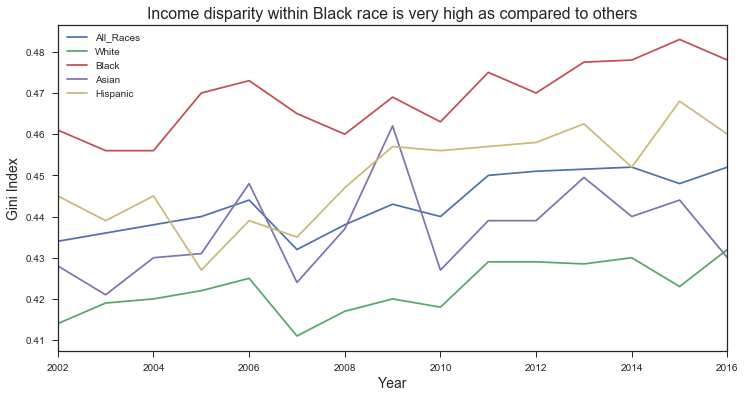

In [16]:
GiniByRace.plot(x="Year", y=["All_Races", "White", "Black","Asian","Hispanic"],kind="line",figsize =(12,6),label="Race")
plt.title("Income disparity within Black race is very high as compared to others", fontsize=16)
plt.ylabel('Gini Index', fontsize = 14)
plt.xlabel("Year", fontsize = 14)
plt.legend(("All_Races", "White", "Black","Asian","Hispanic"), shadow=True);

This graph shows that there is a general difference in the gini index for each race. for e.g. in the above graph, we can see that the income disparity in Black Race is a lot higher (within their group) as compared to the others. 
Overall, gini indexes is relatively high within Black and Hispanic races and low within Asian and White races.


** Finding 1: There is income disparity between races.** . This is substantiated by different gini indexes for each race

** Finding 2: There is income disparity within each race** . This is substantiated by the fact that gini indexes for individual races is not at the lowest, the numbers are in the range of the overall gini indexes

Therefore, we tried to explore another underlying factor that might affect income disparities within each group i.e. a factor common to all the groups:

** 1. Income Disparities between different Gender groups**
** 2. Income Dispartities between Races within each Gender group**

Note: There is a general rise in the gini indexes over years.

Based on all the above findings, we tried to test the claim that there is income disparity between races.

## CLAIM 2 : Income disparity between men and women is not a myth. There is income disparity between men and women irrespective of the races

Dataset Sources: [WageGap 2016](https://nwlc-ciw49tixgw5lbab.stackpathdns.com/wp-content/uploads/2017/09/Wage-Gap-State-By-State-2017.pdf)

The dataset contains median wages for men and women for each state and state-wise median wages for women of each race and for White men. 

###  Median Wage Distribution of Males & Females across states in the US

In [17]:
# Read the files for each race and merged it together.
MedWag=pd.ExcelFile('MedianWagesDistribution.xlsx')
BWandWM=pd.read_excel(MedWag,'BlackWomenWhiteMen')
LW=pd.read_excel(MedWag,'LatinaWomen')
NW=pd.read_excel(MedWag,'NativeWomen')
AW=pd.read_excel(MedWag,'AsianWomen')
WW=pd.read_excel(MedWag,'WhiteWomen')
MW=pd.read_excel(MedWag,'MenWomen')
MedWag1=BWandWM.merge(LW)
MedWag2=MedWag1.merge(NW)
MedWag3=MedWag2.merge(AW)
MedWag4=MedWag3.merge(WW)
MedWag5=MedWag4.merge(MW)

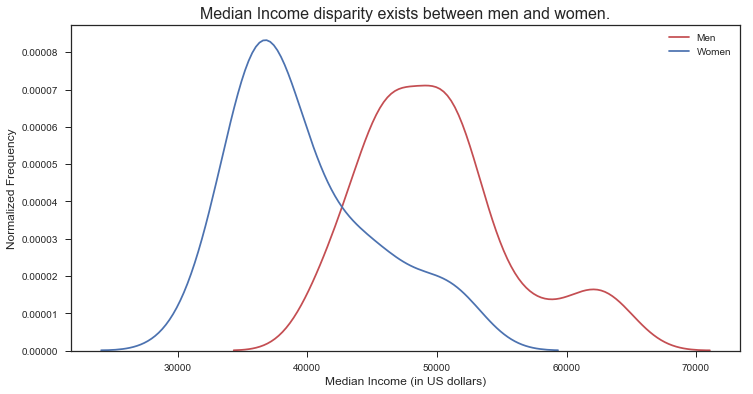

In [18]:
#Distribution of wages of men and women, in general
sns.set_color_codes()
a4_dims = (12, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.distplot(MedWag5.Men, label='Men', hist=False, color="r")
sns.distplot(MedWag5.Women, label='Women', hist=False, color="b")
plt.title("Median Income disparity exists between men and women.", fontsize=16);
plt.xlabel("Median Income (in US dollars)", fontsize = 12)
plt.ylabel("Normalized Frequency", fontsize = 12);

Here, we see that the median income distribution of women is quite to the left as compared to men, which clearly indicates that there is gender income disparity.

**Conclusion**: Income disparity between gender contributes to a higher overall Gini Index

## CLAIM3 : Racial Income disparity gaps persist in U.S

DataSource: [Racewise Wage Distribution 2018](
https://nwlc-ciw49tixgw5lbab.stackpathdns.com/wp-content/uploads/2017/03/Black-Women-State-by-State-2018.pdf
https://nwlc-ciw49tixgw5lbab.stackpathdns.com/wp-content/uploads/2017/03/Latina-Women-State-by-State-2018.pdf
https://nwlc-ciw49tixgw5lbab.stackpathdns.com/wp-content/uploads/2017/03/Latina-Women-State-by-State-2018.pdf
https://nwlc-ciw49tixgw5lbab.stackpathdns.com/wp-content/uploads/2015/12/Native-Women-State-by-State-2018.pdf
https://nwlc-ciw49tixgw5lbab.stackpathdns.com/wp-content/uploads/2017/03/Asian-Women-State-by-State-2018.pdf
https://nwlc-ciw49tixgw5lbab.stackpathdns.com/wp-content/uploads/2016/04/White-Women-State-by-State-2018.pdf)

[New York Time](https://www.nytimes.com/interactive/2018/03/19/upshot/race-class-white-and-black-men.html) shows "even when children grow up next to each other with parents who earn similar incomes, black boys fare worse than white boys." But the large gaps persist between black men and white men but not for women. So when girls have similar background, they are more likely to have same opportunity to be rich as white girls in the future. 

So now we want to exclude the inequality opportunity problem and see the income inequality between different races.

In [19]:
matplotlib.rc('figure', figsize=(12, 6))

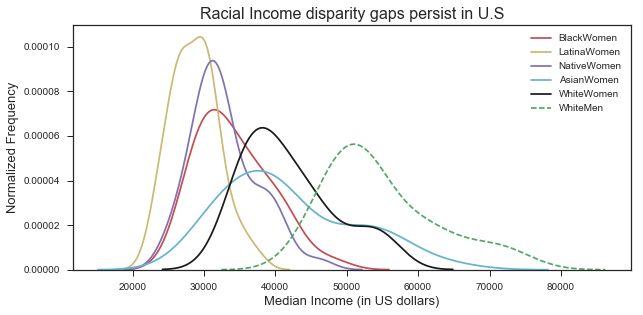

In [20]:
sns.set_color_codes()
a4_dims = (10, 4.5)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.distplot(MedWag5.BlackWomen, label='BlackWomen', hist=False, color="r")
sns.distplot(MedWag5.LatinaWomen, label='LatinaWomen', hist=False, color="y")
sns.distplot(MedWag5.NativeWomen, label='NativeWomen', hist=False, color="m")
sns.distplot(MedWag5.AsianWomen, label='AsianWomen', hist=False, color="c")
sns.distplot(MedWag5.WhiteWomen, label='WhiteWomen', hist=False, color="k")
sns.distplot(MedWag5.WhiteMen, label='WhiteMen', hist=False, color="g",kde_kws={'linestyle':'--'})
plt.title('Racial Income disparity gaps persist in U.S',fontsize=16)
plt.xlabel("Median Income (in US dollars)", fontsize = 13)
plt.ylabel("Normalized Frequency", fontsize = 13);

From this graph, we can see that the distribution of latina women is on the left,and the distribution of white women is on the right as compared to other women.
1. Latina women, native women and black women have relatively lesser median income as compared to asian and white women. They also have smaller standard deviation which means that Latina women have relative low incomes.
2. White men has a higher mean median wage as compared to all women irrespective of races.This is in accordance with our previous claim.
3. Asian women has largest standard deviation, but relative high median income.
4. For the income disparity between black women and white women, if they have same opportunity to be rich with same background, the disparity may caused by income disparity in parents generation. Another possible reason is that new emigrants usually have lower income compared with white. 

Hence we can conclude that there is racial income inequality in the US.

The findings of this graph is in sync with our explorations of gini index within each race where we found that gini indexes is relatively high within Black and Hispanic races and low within Asian and White races.

## OVERALL CONCLUSION:

The following factors contribute to the overall increase in the gini index

1. Income Disparities between Genders 
2. Income Disparities between different Races

## ACTION:

**A. Income disparity between genders:**

<img src="https://github.com/nivs2710/Nivi_Assignments_DataViz/raw/master/TeamProject_Final%20Version/Action1.JPG" width="500" height="400" />

source: [Cause of Gender Wage Gap](https://www.vox.com/2018/2/19/17018380/gender-wage-gap-childcare-penalty)

**Simple things that can be done to encourage women to hold equal positions in organizations and earn equal wages:**

a. Provide paid leave and subsidized or on-site childcare

b. Improve the culture around flexible work policies

**Bigger Interventions that may help improve the situation are:** 

Source: [Blogs](https://www.theatlantic.com/business/archive/2016/03/equal-pay/472407/)

a. The government could make it illegal for companies to pay men more than women at similar positions

b. We should encourage women to take jobs that pay more, and in fields that pay more - this may be 

**B. Income disparity between different races:**

Research shows that there is disparities between education attainment belonging to different races, and it is lower in certain races due to lower educational expectations, low quality day care facilities due to affordability reasons, Lesser Home Literary activities, higher % of juveniles in prison etc. 

Source:[US Newsp- US Education: Still Separate and unequal](https://www.usnews.com/news/blogs/data-mine/2015/01/28/us-education-still-separate-and-unequal)

We should be able to tackle various aspects of these, so that there is equal educational opportunities for the different races. 

Additional initiatives may be taken at a larger scale to encourage people across various races to acquire higher degrees and thus have an oppoortunity at earning equivalent incomes. 

## FURTHER RESEARCH:

1. Research on trying to understand various other factors that affect the Gini Index - Tax, Immigration, Technology and Automation etc.
2. A lot more research can go into even understanding how income disparities across gender and race can be reduced.

## Some additional analysis done as a part of the exploratory data analysis process: Tax Reforms

### Correlation of gini and Tax

Validity: How tax affects gini and income inequality- [Brookings Article](https://www.brookings.edu/articles/which-states-tax-laws-widen-inequality/)

Dataset: [DATA.GOV](https://catalog.data.gov/dataset/state-taxes-and-fees-collected-beginning-fiscal-year-ending-march-31-2003)


In [21]:
df_tax = pd.read_csv('State_Taxes_and_Fees_Collected__Beginning_Fiscal_Year_Ending_March_31__1995.csv')

he above data shows the tax information per year for every category. This data is used for analysis further.
The attributes which we choose for our analysis are Fiscal Year Ended, Amount Collected and Tax Category

In [22]:
# data cleaning
df_tax.columns = df_tax.columns.str.replace('\s+', '_')
df_tax['Fiscal_Year_Ended'].unique()  # The time range for this data set is 1995~2017.

# Replacing the dollar sign from the Amount_Collected column
df_tax['Amount_Collected']=pd.to_numeric(df_tax.Amount_Collected.str.replace('$',''))

# rescale
df_tax['Amount_Collected'] =  (df_tax.Amount_Collected/1000000).round(2)
df_taxnew = df_tax.groupby(['Tax_Category','Fiscal_Year_Ended'],as_index=False).Amount_Collected.sum().reset_index()

Load US Population Data

[US Resident Population yearly 1995-2017](http://www.multpl.com/united-states-population/table)

In [23]:
df_pop = pd.read_excel('US population by year.xlsx')
df_pop['Date']=pd.to_datetime(df_pop['Date'])
df_pop['year']=df_pop['Date'].dt.year
df_pop['Value']=df_pop['Value'].str.replace(' million','')
# Merge tax dataset with population data set.
df_TaxPop = df_taxnew.merge(df_pop, left_on = 'Fiscal_Year_Ended', right_on = 'year')
df_TaxPop['Value']=pd.to_numeric(df_TaxPop['Value'])

Value is the population (million) and Amount_Collected is aggregate tax amount(million) for each tax_category. So we want to see tax per person since the population may change and cause tax amount change.

In [24]:
df_TaxPop['Tax_amount_per person'] = df_TaxPop['Amount_Collected']/df_TaxPop['Value']
# create new variable: tax amount per person

df_TaxPop.columns=['index','Tax_Category','Fiscal_Year_Ended','Amount_Collected(million)','Date','Value(million)','year','Tax_amount(per_person)']
#Change name to distinguish the number scale.

df_TaxPop = df_TaxPop[(df_TaxPop.Tax_Category == 'Corporation and Business')|(df_TaxPop.Tax_Category == 'Personal Income')]
# we only care about two tax categories: Corporation and Business and Personal Income

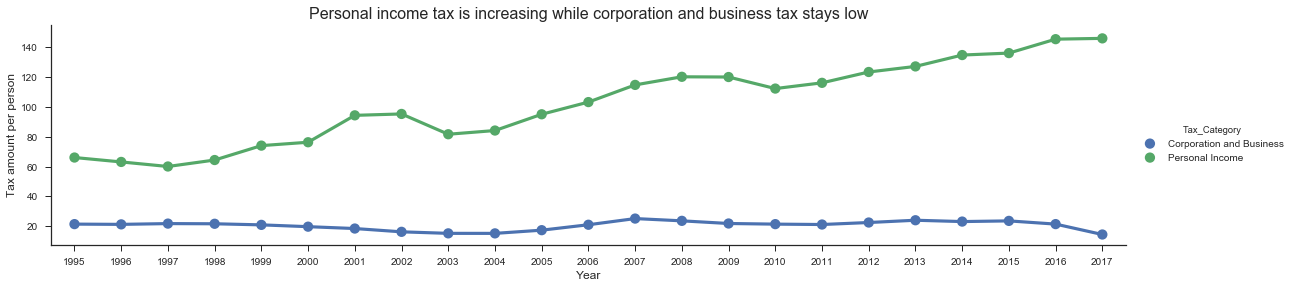

In [25]:
sns.factorplot(y='Tax_amount(per_person)', data=df_TaxPop, x='Fiscal_Year_Ended',hue='Tax_Category',aspect=4)
plt.title('Personal income tax is increasing while corporation and business tax stays low',fontsize=16)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Tax amount per person", fontsize = 12)

Both Total Tax per person and personal tax per person are increasing since 1995 except some years decreased a little.The corporation and business tax per person don't change too much. Other taxes and Fees decreased suddenly since 2003. So we can only personla tax per person increased a lot since 1995.

Loading Gini dataset for further analysis. This Gini is the same file that we used for cleaning and plotting the Gini coeffecient.The same was restored in a csv format for ease of use.

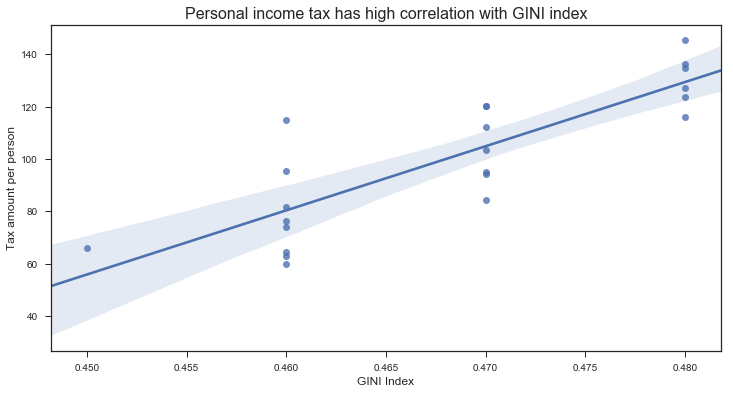

In [26]:
# Merge Gini index data set with the former tax data set df_TaxPop. to analyze if there is any correlation between tax amount collected and increasing gini over years
df_GiniTax = df_TaxPop.merge(Gini, left_on='Fiscal_Year_Ended', right_on='Year')
df_GiniTax1 = df_GiniTax[df_GiniTax.Tax_Category == 'Personal Income']

sns.regplot(x='Gini_Index', data=df_GiniTax1, y='Tax_amount(per_person)')
plt.title('Personal income tax has high correlation with GINI index',fontsize=16)
plt.xlabel("GINI Index", fontsize = 12)
plt.ylabel("Tax amount per person", fontsize = 12);

GINI coefficient has high correlation with personal income tax. The standard deviation is small. Even though we don't know which one is the cause, we can see that higher tax may not decrease income inequality.

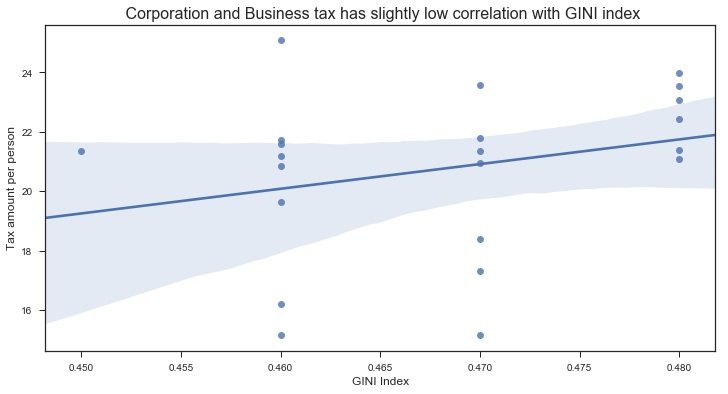

In [27]:
df_GiniTax2 = df_GiniTax[df_GiniTax.Tax_Category == 'Corporation and Business']

sns.regplot(x='Gini_Index', data=df_GiniTax2, y='Tax_amount(per_person)')
plt.title(' Corporation and Business tax has slightly low correlation with GINI index',fontsize=16)
plt.xlabel("GINI Index", fontsize = 12)
plt.ylabel("Tax amount per person", fontsize = 12);

From the above gragh, we can see several outliers and the standard deviation is large. So Corporation and Business tax has slightly low correlation with GINI index but it is not so clear.

## Improvements in the final version as compared to the earlier versions

1. Added secondary research sources and context. 
2. Improved the narrative.
2. Standardized the graphs, e.g. title and axes font sizes, and types, markers, added titles to all.
3. Added one more graph (percentage gap between gender in the same position) to avoid rebuttal problem and make our claim more actionable but finally we decide only use the numbers because we don't want to waste graph ink.
4. Added some additional sources and references.
5. Action based on the narrative, and future research road map on this topic.

## Feedback received during the class presentation

1. Add an additional factor for analysis: 
    This will need additional analysis and further data sets, hence we are not doing it now.    
   
2. Change the colors for the distribution charts:
     We have used almost all colors, since there are several distribution charts, so cannot change it too much. 
       
3. Convert bottom 40% and top 1% income share into a pie chart:
     We cannot do that since we are showing a time trend
       
4. Long term impact of income inequality (Incorporated the changes after the presentation):
     We have added the long term impact of inequality in the beginning to tell the impact of income inequality.
    
5. Change black race to African-American:
     We can't do that because the data itself uses "black" and African-American is more general. Also New York Times use black boy for similar topic. 
        